# aula2


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ECzgbTfp2GzTM1A_tvaOc6G1gvJcU8OR?usp=drive_link)

### Importa a biblioteca pandas abriviada para pd
### Pandas é usada para manipulação e análise de dados

In [ ]:
import pandas as pd

### DataFrame é uma estrutura de uma tabela de Excel
### df é uma abreviação para esse DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dhirajk100/Naive-Bayes/master/Naive-Bayes-Classification-Data.csv')

### Exibe as primeiras 10 linhas do DataFrame
### Útil para visualizar a estrutura inicial dos dados

In [ ]:
df.head(10)

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


### Exibe as últimas 5 linhas do DataFrame
### Útil para verificar o final dos dados

In [ ]:
df.tail()

,glucose,bloodpressure,diabetes
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1
994,45,82,0


### Mostra informações sobre o DataFrame:
 - Número de linhas e colunas
 - Nomes das colunas
 - Tipos de dados de cada coluna
 - Quantidade de valores não nulos em cada coluna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


### Gera estatísticas descritivas para colunas numéricas:
 - Contagem (count)
 - Média (mean)
 - Desvio padrão (std)
 - Valor mínimo (min)
 - Quartis (25%, 50%, 75%)
  - Valor máximo (max)

In [ ]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


### Conta valores ausentes em cada coluna:
 1. df.isna() cria um DataFrame booleano (True onde há valor ausente)
 2. .sum() conta os True em cada coluna

In [ ]:
df.isna().sum()

,0
glucose,0
bloodpressure,0
diabetes,0


## NORMALIZAÇÃO DOS DADOS

### Importa o MinMaxScaler do scikit-learn
### Este normalizador transforma dados para um intervalo específico (padrão: 0 a 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### Cria uma instância do normalizador com intervalo de 0 a 1
### Todos os valores serão escalados para ficarem entre 0 e 1

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))

### Obtém os nomes de todas as colunas do DataFrame

In [ ]:
colunas = df.columns


### Define quais colunas serão normalizadas

In [ ]:
col_normalizacao = ['glucose','bloodpressure']

### Loop para normalizar cada coluna especificada

In [ ]:
for col in col_normalizacao:
  # Para cada coluna na lista:
  # 1. df[col].values.reshape(-1, 1) - pega os valores e reformata para 2D
  # 2. normalizador.fit_transform() - calcula e aplica a normalização
  # 3. Atribui os valores normalizados de volta à coluna original
  df[col] = normalizador.fit_transform(df[col].values.reshape(-1, 1))

### Exibe as primeiras 5 linhas após normalização para verificar

In [ ]:
df.head()

,glucose,bloodpressure,diabetes
0,0.4,0.70,0
1,0.4,0.84,0
2,0.5,0.26,1
3,0.5,0.60,0
4,0.4,0.46,1


## SEPARAÇÃO EM DADOS DE TREINO E TESTE

### Importa a função train_test_split para dividir dados
### É essencial para avaliar modelos de machine learning

In [ ]:
from sklearn.model_selection import train_test_split

#### Define as variáveis independentes para o modelo selecionado da colunas 'glucose' e 'bloodpressure', .values converte para array numpy

In [ ]:
x = df[['glucose','bloodpressure']].values

#### Define o target para a coluna 'diabetes'

In [ ]:
y = df['diabetes'].values


#### Divide os dados em conjuntos de treino e teste:
 - test_size=0.3: 30% dos dados para teste, 70% para treino
 - raandom_state=0: garante uma divisão de dados uniforme evitando variação toda vez que e executado  

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=0)

## Criação do modelo

#### Importa o classificador Naive Bayes Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo = GaussianNB()

#### Treina o modelo com os dados de treino:
 - x_treino: features de treino
 - y_treino: target de treino

#### fazendo a previsão nos dados de teste

In [ ]:
modelo.fit(x_treino, y_treino)

GaussianNB()

#### Usa o modelo treinado para fazer previsões nos dados de teste

In [ ]:
y_pred = modelo.predict(x_teste)

## Avaliação do modelo

In [ ]:
# função para calcular matriz de confusão
from sklearn.metrics import confusion_matrix
# visualização de dados
import seaborn as sns


### Criação da matriz de confusão comparando valores reais (y_teste) com previsões (y_pred)
#### A matriz mostra:
#### - Verdadeiros positivos e negativos (diagonal principal)
#### - Falsos positivos e negativos (fora da diagonal)

In [ ]:
matriz = confusion_matrix(y_teste, y_pred)

### criação do mapa de calor da matriz de confusão
#### - annot=True: mostra os valores nas células
#### - fmt="d": formata os números como inteiros

<Axes: >

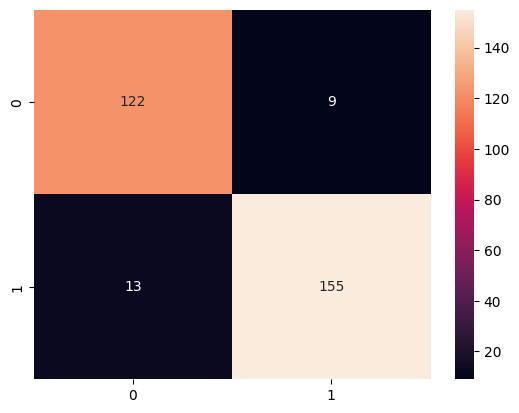

In [ ]:
sns.heatmap(matriz, annot=True, fmt="d")

In [ ]:
# Calcula a acurácia do modelo nos dados de teste:
# Percentual de previsões corretas em relação ao total
modelo.score(x_teste, y_teste)


0.9264214046822743

In [ ]:
# Calcula a acurácia do modelo nos dados de treino:
# Para verificar se há overfitting
modelo.score(x_treino, y_treino)

0.9367816091954023

## EXPLICAÇÃO GERAL

In [ ]:
print("""
Este código realiza um projeto completo de machine learning:

1. CARREGAMENTO E EXPLORAÇÃO DE DADOS:
   - Carrega dados de diabetes de uma URL do GitHub
   - Explora os dados com head(), tail(), info(), describe()
   - Verifica valores ausentes

2. PRÉ-PROCESSAMENTO:
   - Normaliza as colunas 'glucose' e 'bloodpressure' para escala 0-1
   - Essa normalização é importante para muitos algoritmos de ML

3. PREPARAÇÃO PARA MODELAGEM:
   - Separa os dados em features (x) e target (y)
   - Divide em conjuntos de treino (70%) e teste (30%)

4. MODELAGEM COM NAIVE BAYES:
   - Usa o algoritmo Gaussian Naive Bayes
   - Treina o modelo com dados de treino
   - Faz previsões com dados de teste

5. AVALIAÇÃO DO MODELO:
   - Cria matriz de confusão para análise detalhada
   - Calcula acurácia em dados de teste e treino
   - Visualiza resultados com seaborn

O objetivo é prever diabetes com base nos níveis de glucose e pressão arterial.
""")


Este código realiza um projeto completo de machine learning:

1. CARREGAMENTO E EXPLORAÇÃO DE DADOS:
   - Carrega dados de diabetes de uma URL do GitHub
   - Explora os dados com head(), tail(), info(), describe()
   - Verifica valores ausentes

2. PRÉ-PROCESSAMENTO:
   - Normaliza as colunas 'glucose' e 'bloodpressure' para escala 0-1
   - Essa normalização é importante para muitos algoritmos de ML

3. PREPARAÇÃO PARA MODELAGEM:
   - Separa os dados em features (x) e target (y)
   - Divide em conjuntos de treino (70%) e teste (30%)

4. MODELAGEM COM NAIVE BAYES:
   - Usa o algoritmo Gaussian Naive Bayes
   - Treina o modelo com dados de treino
   - Faz previsões com dados de teste

5. AVALIAÇÃO DO MODELO:
   - Cria matriz de confusão para análise detalhada
   - Calcula acurácia em dados de teste e treino
   - Visualiza resultados com seaborn

O objetivo é prever diabetes com base nos níveis de glucose e pressão arterial.

